In [609]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [610]:
df = pd.read_csv("insurance.csv")

In [611]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Cleaning

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [613]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Feature Engineering

In [614]:
male = pd.get_dummies(df['sex'], drop_first=True)
df = pd.concat([df,male], axis = 1)
male

,male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [615]:
df

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True
1334,18,female,31.920,0,no,northeast,2205.98080,False
1335,18,female,36.850,0,no,southeast,1629.83350,False
1336,21,female,25.800,0,no,southwest,2007.94500,False


In [616]:
smoker = pd.get_dummies(df['smoker'], drop_first=True)
df = pd.concat([df,smoker], axis = 1)
smoker

,yes
0,True
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [617]:

df

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False
1334,18,female,31.920,0,no,northeast,2205.98080,False,False
1335,18,female,36.850,0,no,southeast,1629.83350,False,False
1336,21,female,25.800,0,no,southwest,2007.94500,False,False


In [618]:
df = df.rename(columns= {'yes' : 'Smoker'})
df

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False
1334,18,female,31.920,0,no,northeast,2205.98080,False,False
1335,18,female,36.850,0,no,southeast,1629.83350,False,False
1336,21,female,25.800,0,no,southwest,2007.94500,False,False


In [619]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [620]:
region = pd.get_dummies(df['region'], drop_first=True)
df = pd.concat([df,region], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


Exploratory Analysis

In [621]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Distribution of  Sex Parameter

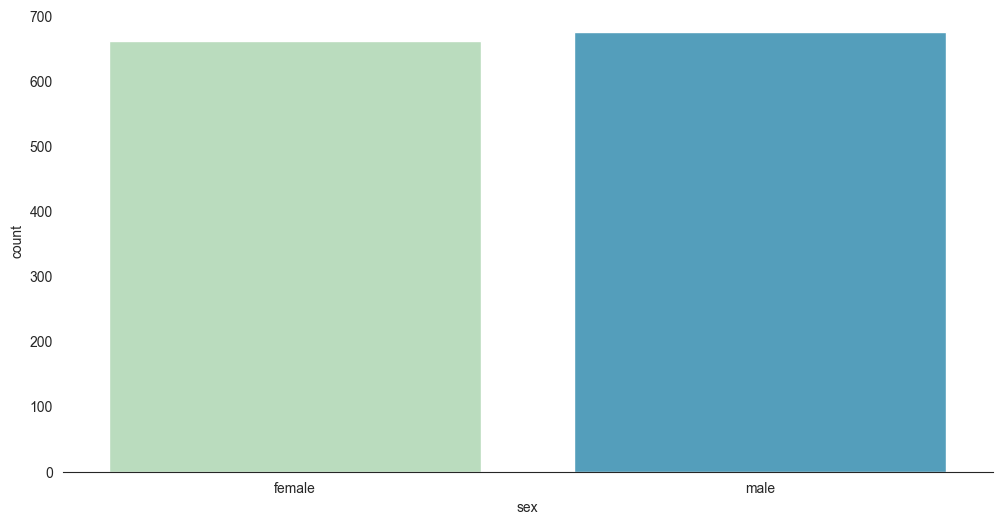

In [622]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = "GnBu")
sns.despine(left = True)

Relationship of smoking and gender wrt charges

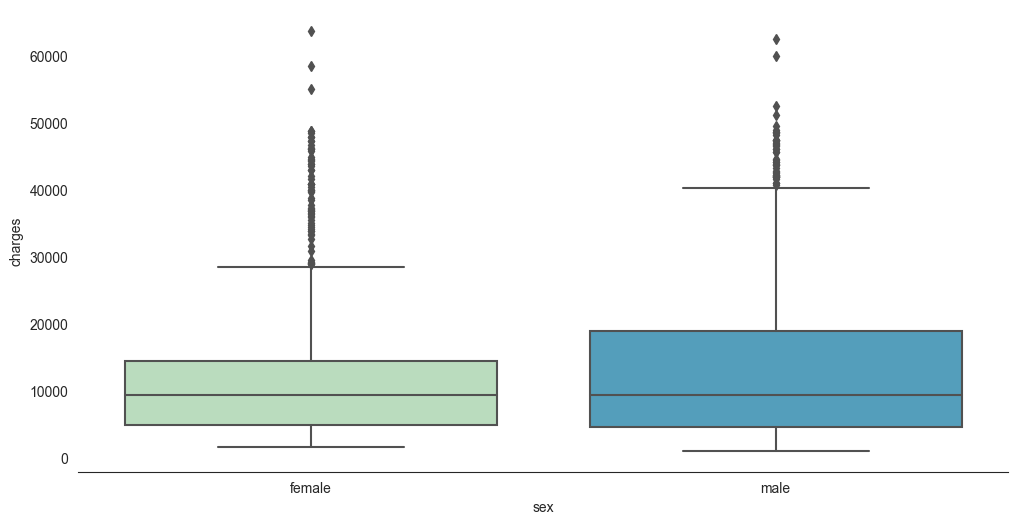

In [623]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data= df, palette = "GnBu")
sns.despine(left = True)

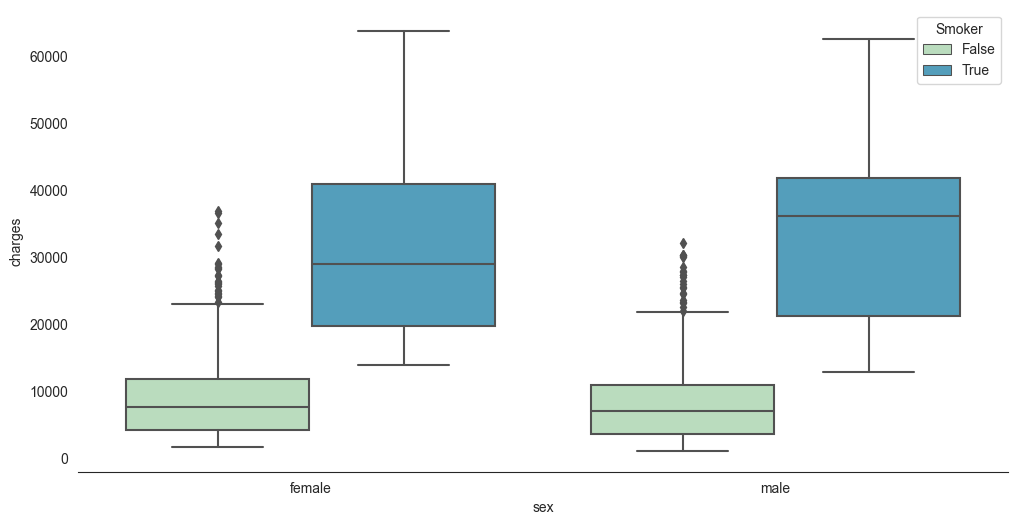

In [624]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data= df, palette = "GnBu", hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

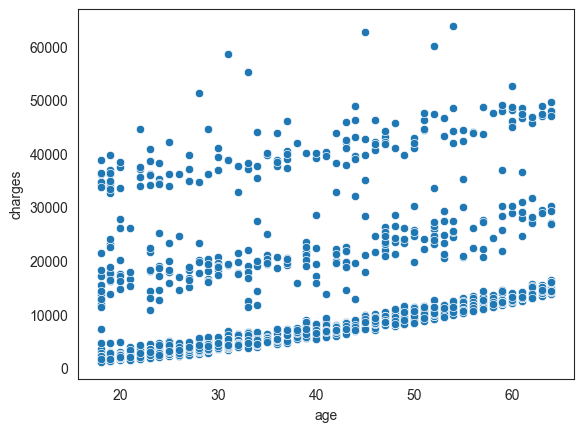

In [625]:
sns.scatterplot(x='age', y='charges', data=df)

<Axes: xlabel='age', ylabel='charges'>

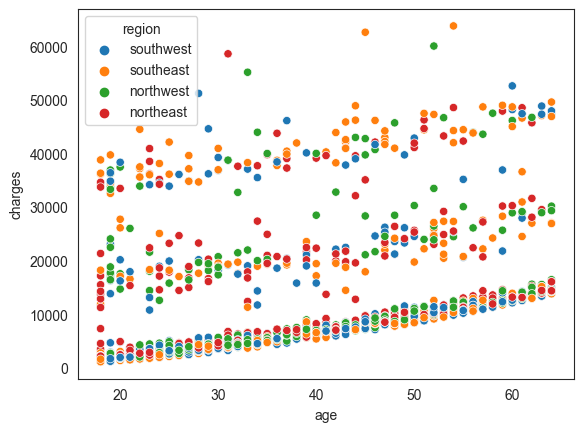

In [626]:
sns.scatterplot(x='age', y='charges', data=df, hue='region')

<Axes: xlabel='age', ylabel='charges'>

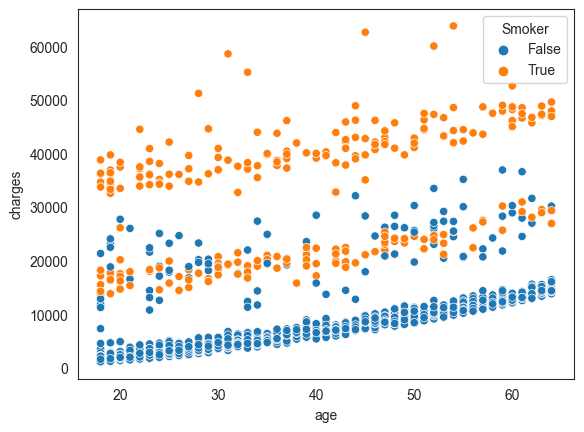

In [627]:
sns.scatterplot(x='age', y='charges', data=df, hue='Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

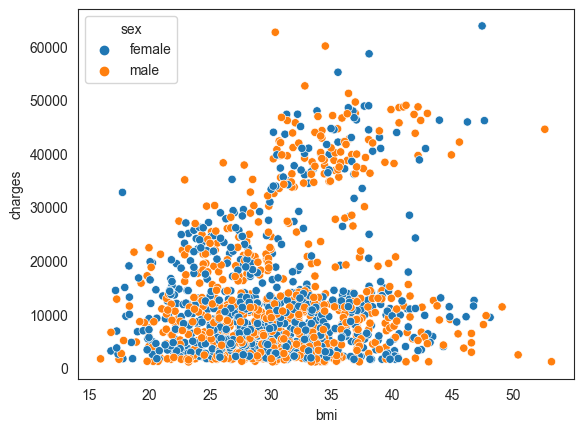

In [628]:
sns.scatterplot(x='bmi', y='charges', data=df, hue='sex')

<Axes: xlabel='bmi', ylabel='charges'>

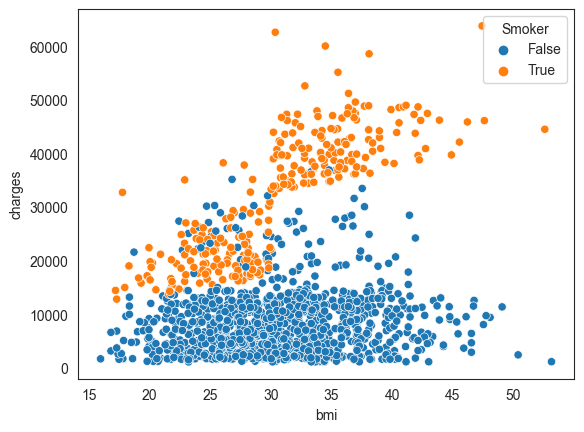

In [629]:
sns.scatterplot(x='bmi', y='charges', data=df, hue='Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

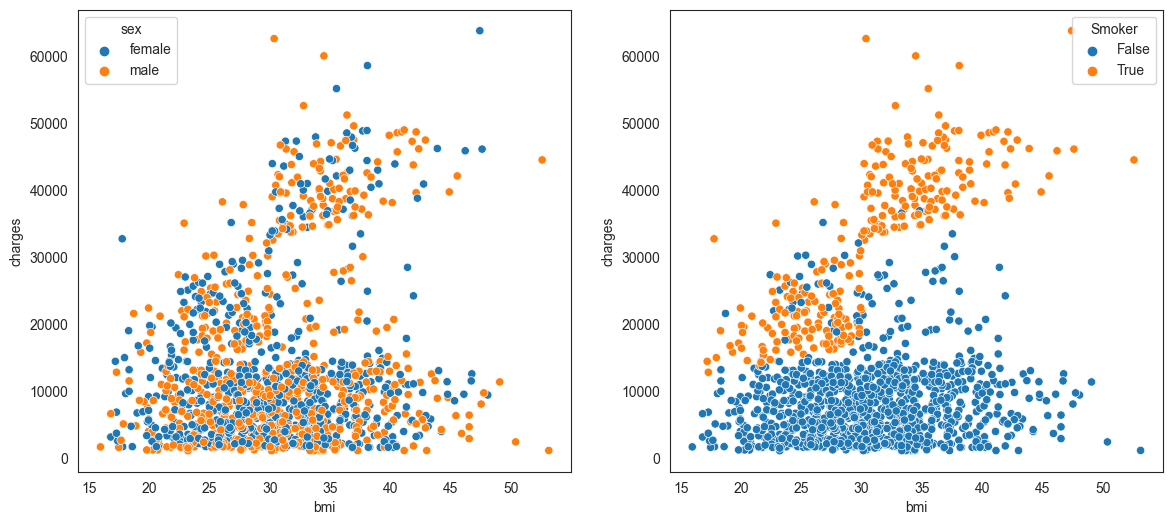

In [630]:
fid, ax = plt.subplots(nrows =1 , ncols =2, figsize = (14, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='sex', ax = ax[0])
sns.scatterplot(x='bmi', y='charges', data=df, hue='Smoker',ax = ax[1])

In [631]:
df.drop(['sex','smoker','region','northwest','southwest','southeast','male'], axis = 1, inplace=True)

In [632]:
df.head()

,age,bmi,children,charges,Smoker
0,19,27.900,0,16884.92400,True
1,18,33.770,1,1725.55230,False
2,28,33.000,3,4449.46200,False
3,33,22.705,0,21984.47061,False
4,32,28.880,0,3866.85520,False


<Axes: >

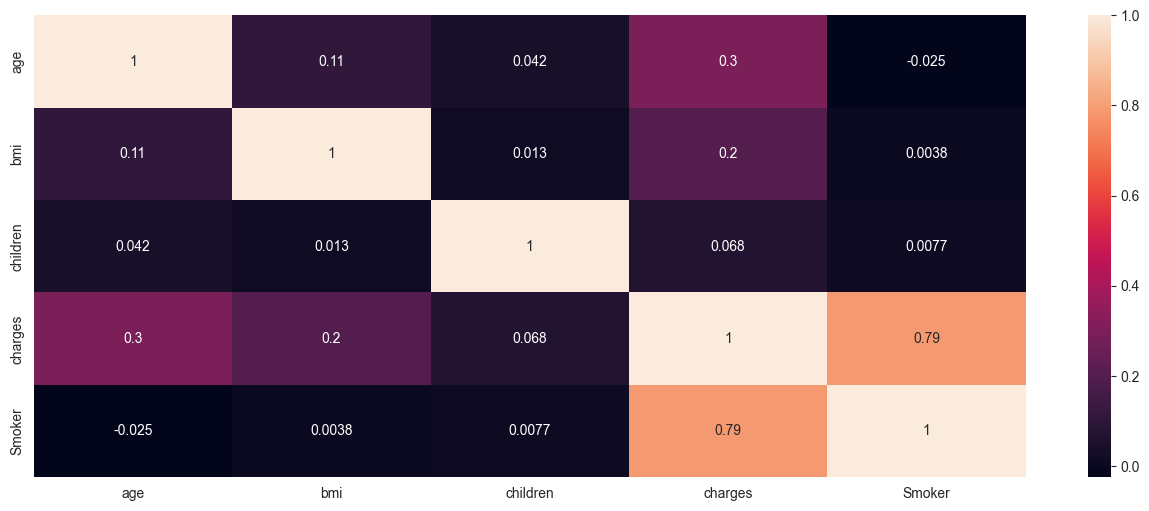

In [633]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

Splitting the data

In [634]:
x = df.drop('charges', axis =1 )
y = df['charges']

In [635]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [636]:
x_train.shape

(802, 4)

In [637]:
x_test.shape

(536, 4)

In [638]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [639]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [640]:
scaled_x_train

array([[-0.27049327,  0.09065466, -0.07633357, -0.51282758],
       [-0.34152654,  0.62380335, -0.91495717, -0.51282758],
       [-1.19392575, -0.8768192 , -0.91495717, -0.51282758],
       ...,
       [-1.12289249, -0.35612726, -0.91495717,  1.94997313],
       [ 1.00810556,  0.14878614, -0.91495717, -0.51282758],
       [ 0.58190595,  2.83446035, -0.07633357, -0.51282758]])

Support Vector Regression Model

In [641]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(scaled_x_train, y_train)

SVR()

In [642]:
predict = regressor.predict(scaled_x_test)

In [643]:
predict.shape

(536,)

In [644]:
y_test.shape

(536,)

In [645]:
predict[:10]

array([9120.71322522, 9005.01940007, 9044.33238973, 9094.26614033,
       9138.25740876, 9049.08353138, 8994.93493308, 9158.68313898,
       9164.47733172, 9029.87092291])

In [646]:
y_test[:10]

925     25333.33284
1244     1135.94070
1058     2480.97910
610      8547.69130
1088     9748.91060
1248     1633.96180
1150     2203.73595
770     27941.28758
1120    34166.27300
866      1141.44510
Name: charges, dtype: float64

In [647]:
from sklearn.metrics import mean_squared_error 
### mean squared error = (1/n) sigma i=1 to n (observed output - predicted output)^2

cost = mean_squared_error(y_test, predict)
cost


167715384.51391423